# Team 6 Project 1 : Analysis of Regionwise Sales Data for Video Games
Team: Mark Levine, Richa Singh, John Yun, Miguel Gomez

Data Sources and Citations
Data source Twitter.com

VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis "Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014."

Notebook Contents
VADER analysis of Tweets from the top publishers

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Output File (CSV)
output_data_file = "output_data/VG_tweets.csv"

In [2]:
# Target User Accounts
target_users = ("@PlayStation", "@Activision", "@NintendoAmerica", "@EA")
# List for dictionaries of results
sentiments = []
# Counter
counter = 1
oldest_tweet = None


# Loop through each user
for user in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
  # Loop through 10 pages of tweets (total 100 tweets)
    for x in range(10):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            # Print Tweets
            # print("Tweet {counter}: {tweet["text"]})

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
             # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Append to sentiments list

            sentiments.append({ "Username": user,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            # Add to counter 
            counter += 1



In [3]:
# Create DataFrame from Results List
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,Username
0,0.0000,Thu Sep 20 22:48:43 +0000 2018,0.748,0.126,0.126,1,@PlayStation
1,0.6239,Thu Sep 20 22:11:55 +0000 2018,0.849,0.000,0.151,2,@PlayStation
2,0.5106,Thu Sep 20 20:14:19 +0000 2018,0.852,0.000,0.148,3,@PlayStation
3,0.3612,Thu Sep 20 18:56:34 +0000 2018,0.902,0.000,0.098,4,@PlayStation
4,0.6514,Thu Sep 20 18:39:56 +0000 2018,0.829,0.000,0.171,5,@PlayStation


In [4]:
# drop the @in username 
sentiments_pd["Username"] = sentiments_pd["Username"].map(lambda x: str(x)[1:])
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,Username
0,0.0000,Thu Sep 20 22:48:43 +0000 2018,0.748,0.126,0.126,1,PlayStation
1,0.6239,Thu Sep 20 22:11:55 +0000 2018,0.849,0.000,0.151,2,PlayStation
2,0.5106,Thu Sep 20 20:14:19 +0000 2018,0.852,0.000,0.148,3,PlayStation
3,0.3612,Thu Sep 20 18:56:34 +0000 2018,0.902,0.000,0.098,4,PlayStation
4,0.6514,Thu Sep 20 18:39:56 +0000 2018,0.829,0.000,0.171,5,PlayStation


In [5]:
#Setting the data frames by the Usernames, converting the time stamp strings and 
#sorting by date and time for the latest 100 tweets 

#PlayStation
playstation = sentiments_pd.loc[sentiments_pd["Username"] == "PlayStation", :]
playstation = pd.DataFrame(playstation)

#Convert tweet timestamps to datetime objects that can be manipulated by
# Python
   
playstation['Date'] = pd.to_datetime(playstation.Date)
 
playstation['Date']= playstation['Date'].dt.strftime('%a %b %d %H:%M:%S %z %Y')

# sort by time stamps
playstation_sorted = playstation.sort_values('Date', ascending = False)
playstation_sorted = pd.DataFrame(playstation_sorted)

playstation_sorted = playstation_sorted.assign(tweet=[1 + i for i in range(len(playstation_sorted))])[['tweet'] + playstation_sorted.columns.tolist()]

#Set x, y coordinates for sorted data
playstation_tweetsago = playstation_sorted["tweet"]
playstation_compound = playstation_sorted["Compound"]



#Activision
activision = sentiments_pd.loc[sentiments_pd["Username"] == "Activision", :]
activision = pd.DataFrame(activision)

#Convert tweet timestamps to datetime objects that can be manipulated by
# Python
   
activision['Date'] = pd.to_datetime(activision.Date)
 
activision['Date']= activision['Date'].dt.strftime('%a %b %d %H:%M:%S %z %Y')

# sort by time stamps
activision_sorted = activision.sort_values('Date', ascending = False)
activision_sorted = pd.DataFrame(activision_sorted)
activision_sorted = activision_sorted.assign(tweet=[1 + i for i in range(len(activision_sorted))])[['tweet'] + activision_sorted.columns.tolist()]

#Set x, y coordinates for sorted data
activision_tweetsago = activision_sorted["tweet"]
activision_compound = activision_sorted["Compound"]


#NintendoAmerica
nintendoA = sentiments_pd.loc[sentiments_pd["Username"] == "NintendoAmerica", :]
nintendoA = pd.DataFrame(nintendoA)

#Convert tweet timestamps to datetime objects that can be manipulated by
# Python
   
nintendoA['Date'] = pd.to_datetime(nintendoA.Date)
 
nintendoA['Date']= nintendoA['Date'].dt.strftime('%a %b %d %H:%M:%S %z %Y')

# sort by time stamps
nintendoA_sorted = nintendoA.sort_values('Date', ascending = False)
nintendoA_sorted = pd.DataFrame(nintendoA_sorted)
nintendoA_sorted = nintendoA_sorted.assign(tweet=[1 + i for i in range(len(nintendoA_sorted))])[['tweet'] + nintendoA_sorted.columns.tolist()]

#Set x, y coordinates for sorted data
nintendoA_tweetsago = nintendoA_sorted["tweet"]
nintendoA_compound = nintendoA_sorted["Compound"]

#EA
ea = sentiments_pd.loc[sentiments_pd["Username"] == "EA", :]
ea = pd.DataFrame(ea)

#Convert tweet timestamps to datetime objects that can be manipulated by
# Python
   
ea['Date'] = pd.to_datetime(ea.Date)
 
ea['Date']= ea['Date'].dt.strftime('%a %b %d %H:%M:%S %z %Y')

# sort by time stamps
ea_sorted = ea.sort_values('Date', ascending = False)
ea_sorted = pd.DataFrame(ea_sorted)

ea_sorted = ea_sorted.assign(tweet=[1 + i for i in range(len(ea_sorted))])[['tweet'] + ea_sorted.columns.tolist()]

#Set x, y coordinates for sorted data
ea_tweetsago = ea_sorted["tweet"]
ea_compound = ea_sorted["Compound"] 


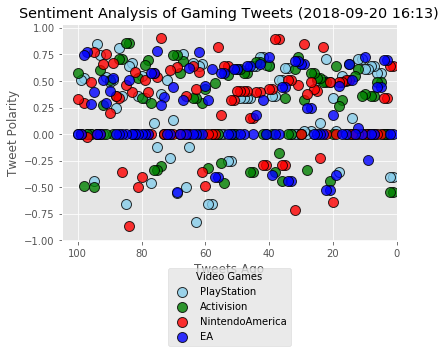

<Figure size 432x288 with 0 Axes>

In [7]:
# Build the scatter plots for each Video Game group
playstation_scatter = plt.scatter(playstation_tweetsago,
            playstation_compound, 
            c="skyblue", 
            s=100,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="PlayStation")

activision_scatter = plt.scatter(activision_tweetsago, 
            activision_compound, 
            c="green", 
            s=100,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Activision")

nintendoA_scatter = plt.scatter(nintendoA_tweetsago, 
            nintendoA_compound, 
            c="red", 
            s=100,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="NintendoAmerica")

ea_scatter = plt.scatter(ea_tweetsago, 
            ea_compound, 
            c="blue", 
            s=100,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="EA")

 

plt.legend(handles=[playstation_scatter, activision_scatter, nintendoA_scatter, ea_scatter], title='Video Games',
           loc='upper center', bbox_to_anchor=(0.5,-0.1))

x_limit = 105
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Gaming Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(x_limit,0)
plt.show()


plt.savefig("output_data/sentiments_scatter.png")
 



# Vader Score Scatter observations 
1. There is a clustering of the scores on the positive side of the chart 

In [8]:
#BAR CHART
# summarize data for bar chart
user_group =sentiments_pd.groupby("Username")
compound_average = user_group["Compound"].mean().round(3)
compound_average 

Username
Activision         0.221
EA                 0.207
NintendoAmerica    0.242
PlayStation        0.220
Name: Compound, dtype: float64

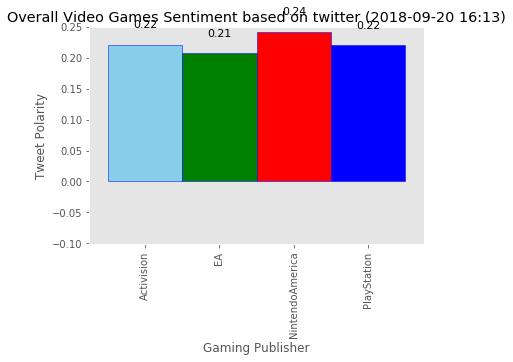

<Figure size 432x288 with 0 Axes>

In [11]:
#Overall Media Sentiment Bar Chart
colors = ['skyblue','green','red', 'blue', 'yellow']
sentiment_chart = compound_average.plot(kind='bar', color=colors, align ='center',width=1.0, edgecolor ='b')

# Set the xlabel and ylabel 
sentiment_chart.set_xlabel("Gaming")
sentiment_chart.set_ylabel("Tweet Polarity")

#Bar value labels 
ax=sentiment_chart
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
sentiment_chart.set_ylim(-0.1010,0.25) #To make space for the annotations 

#Other properties of the chart
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Video Games Sentiment based on twitter ({now})") 
plt.ylabel("Tweet Polarity")
plt.xlabel("Gaming Publisher")
plt.grid(False)
plt.show()

plt.savefig("output_data/sentiments_bar2.png")
 

# Sentiment Analysis of the VADER score 
1. The sentiment score from the top publishers is very close in scores showing its largely positive and similar. 